In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [131]:
df = pd.read_excel("C:/Users/Shreha Jalan/Desktop/G4G_codes/EDA_dataset/Online Retail.xlsx")

In [133]:
df= df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [22]:
df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [23]:
df.isnull().head()


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [24]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [25]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [27]:
df.Country.unique().shape

(38,)

In [28]:
df.Country.unique().size

38

In [ ]:
#Business type
#The given dataset is of online retail business spread across 38 countries

In [134]:
#feature engineering is done creating new column of total amount of sales
TotalAmount = df['Quantity']*df['UnitPrice']
df.insert(loc = 5,column = 'TotalAmount', value = TotalAmount)

In [135]:
new_df = df

In [45]:
new_df.head()


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom


In [136]:
#understanding the sales country wise
CountryPrice = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)

In [137]:
CountryPrice.head()

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Name: Quantity, dtype: int64

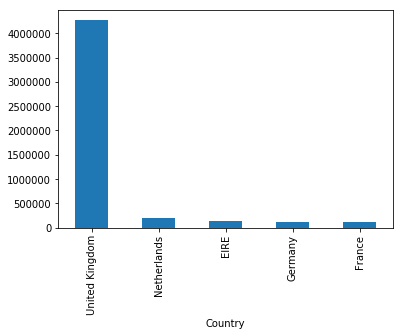

In [138]:
#Checking top 5 countries with higher no. of purchase
CountryPrice[:5].plot(kind = 'bar')

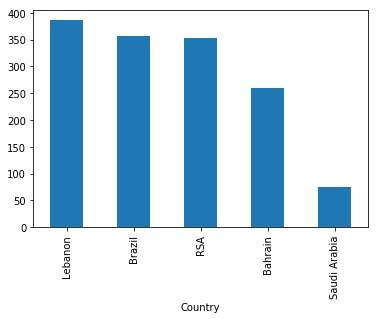

In [139]:
#Checking with top 5 countries with least no. of purchase
CountryPrice[-5:].plot(kind = 'bar')

In [140]:
#Adding year feature to the dataset
TimeSet = new_df['InvoiceDate'].dt.year
TimeSet.head()
new_df['Year']  = TimeSet
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010


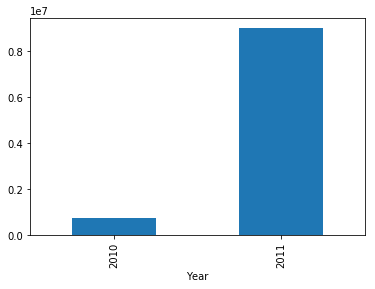

In [141]:
#Graphical representation of total sales in 2011 and 2010 to get a picture of comparison
new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

In [142]:
#Adding month feature to the dataset
new_df['Month'] = new_df['InvoiceDate'].dt.month

In [143]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Year,Month
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,United Kingdom,2010,12
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,2010-12-01 08:26:00,United Kingdom,2010,12
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,United Kingdom,2010,12
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,United Kingdom,2010,12
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,United Kingdom,2010,12


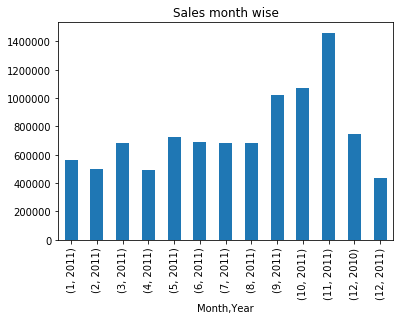

In [144]:
#Plotting total sales done for different month of 2010 and 2011
new_df.groupby(['Month','Year'])['TotalAmount'].sum().plot(kind ='bar', title = 'Sales month wise')

In [145]:
#Checking why december 2011 has a drop in sales comparing to november 2011
new_df2011 = new_df[(new_df['Year'] == 2011)]

In [146]:
new_df2011.head()


,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Year,Month
42481,13313.0,539993,22386,10,1.95,19.5,JUMBO BAG PINK POLKADOT,2011-01-04 10:00:00,United Kingdom,2011,1
42482,13313.0,539993,21499,25,0.42,10.5,BLUE POLKADOT WRAP,2011-01-04 10:00:00,United Kingdom,2011,1
42483,13313.0,539993,21498,25,0.42,10.5,RED RETROSPOT WRAP,2011-01-04 10:00:00,United Kingdom,2011,1
42484,13313.0,539993,22379,5,2.10,10.5,RECYCLING BAG RETROSPOT,2011-01-04 10:00:00,United Kingdom,2011,1
42485,13313.0,539993,20718,10,1.25,12.5,RED RETROSPOT SHOPPER BAG,2011-01-04 10:00:00,United Kingdom,2011,1


In [147]:
#Fetching the records for the month of Decemeber 2011
new_df20111dec = new_df2011[(new_df2011['Month']) == 12]

In [148]:
new_df20111dec.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country,Year,Month
516384,13853.0,C579889,23245,-8,4.15,-33.20,SET OF 3 REGENCY CAKE TINS,2011-12-01 08:12:00,United Kingdom,2011,12
516385,15197.0,C579890,84947,-1,1.25,-1.25,ANTIQUE SILVER TEA GLASS ENGRAVED,2011-12-01 08:14:00,United Kingdom,2011,12
516386,15197.0,C579890,23374,-1,0.82,-0.82,RED SPOT PAPER GIFT BAG,2011-12-01 08:14:00,United Kingdom,2011,12
516387,15197.0,C579890,84945,-2,0.85,-1.70,MULTI COLOUR SILVER T-LIGHT HOLDER,2011-12-01 08:14:00,United Kingdom,2011,12
516388,13644.0,C579891,23485,-1,25.00,-25.00,BOTANICAL GARDENS WALL CLOCK,2011-12-01 08:18:00,United Kingdom,2011,12


In [149]:
new_df20111dec.count()

CustomerID     17661
InvoiceNo      25525
StockCode      25525
Quantity       25525
UnitPrice      25525
TotalAmount    25525
Description    25510
InvoiceDate    25525
Country        25525
Year           25525
Month          25525
dtype: int64

In [150]:
new_df20111dec = new_df20111dec['InvoiceDate'].dt.date.unique()
new_df20111dec

array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [ ]:
#Business Performance
#-We have sales for only december month in 2010 and sales for all months in 2011.
#That is why we found sales was much lesser in year 2010.
#-Business had good sales from September to November
#-We saw a huge drop of sales from november 2011 to december 2011.
#On analysis we found that the sales data available only upto 9th december 2011.

In [86]:
new_df2 = new_df.dropna()

In [87]:
new_df2.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
UnitPrice      0
TotalAmount    0
Description    0
InvoiceDate    0
Country        0
Year           0
Month          0
dtype: int64

In [88]:
#Know the countries with more number of customers
customers = new_df2.groupby('Country')['CustomerID'].count().sort_values(ascending = False)

In [90]:
customers.head()

Country
United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: CustomerID, dtype: int64

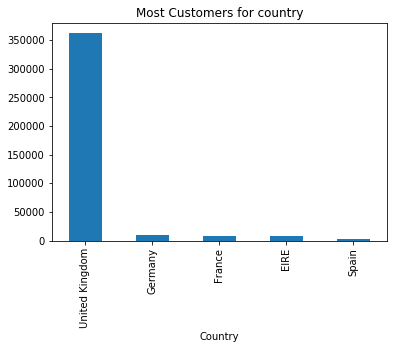

In [92]:
#Top 5 countries with highest number of sales.
customers[:5].plot(kind = 'bar', title = 'Most Customers for country')

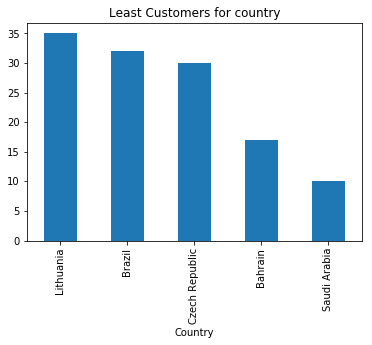

In [93]:
#Top 5 countries with least number of sales.
customers[-5:].plot(kind = 'bar', title = 'Least Customers for country')

In [ ]:
#Potential areas of improvement for the business
#-Sales are high from September 2011 to November 2011.We could concentrate on improving the sales for other 8 months.
#-Business have less customers in some of the countries like Brazil, Saudi Arabia and some more and
# hence it has less number of sales in those countries.We could improve business by increasig the number of
# customers and sales for those countries.

In [96]:
#Figuring the average sales of each products to know the demand of each
avg_product_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)

In [97]:
avg_product_sales.head()

,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000


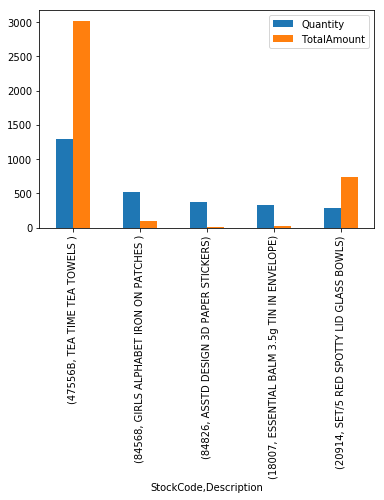

In [98]:
#Top 5 products with highest sales in market.
avg_product_sales[:5].plot(kind = 'bar')

In [155]:
#Further analysis could be made to know additional business problems
#Could check the total sales of each product knowing their demand in market 
#Could check the sales of product month wise to know the seasonality of product both individually and country wise
#Could check the likeliness of demand of each product for each customers
#Accordingly could focus on the market depending upon the type of customers and seasonal products it favours.

Country    StockCode  Description                        
Australia  15036      ASSORTED COLOURS SILK FAN              600.000000
           20665      RED RETROSPOT PURSE                      6.000000
           20675      BLUE POLKADOT BOWL                     108.000000
           20676      RED RETROSPOT BOWL                     108.000000
           20677      PINK POLKADOT BOWL                     108.000000
           20685      DOORMAT RED RETROSPOT                   12.500000
           20711      JUMBO BAG TOYS                         100.000000
           20712      JUMBO BAG WOODLAND ANIMALS              10.000000
           20713      JUMBO BAG OWLS                          10.000000
           20717      STRAWBERRY SHOPPER BAG                  10.000000
           20725      LUNCH BAG RED RETROSPOT                 31.111111
           20726      LUNCH BAG WOODLAND                      45.000000
           20727      LUNCH BAG  BLACK SKULL.                 35.000000
      